Reference:   
    [python-matplotlib-guide](https://realpython.com/python-matplotlib-guide/)   
    [官方文档](https://matplotlib.org/gallery/index.html)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
print(matplotlib.__version__)

3.0.2


In [2]:
import numpy as np
np.random.seed(444)

**Matplotlib 对象层次**   
![avatar](fig_map.webp)    
Figure对象是matplotlib 图像的最外层容器，可包含多个Axes 对象   
Axes 对象包括图像相关的元素，轴，标题等（tick marks, individual lines, legends, and text boxes）   
一个 Figure对象有多个Axes；每个 Each Axes 有一个xaxis和yaxis, xaxis和yaxis 都有若干个“major ticks,” 

**Matplotlib的接口**：   
《1》pyplot API import matplotlib.pyplot as plt模块的函数接口     **简单快速作图**   
被用于在当前figure，当前Axes添加lines, images, text等元素。   
《2》object-oriented接口    **稍显复杂，但灵活**   
仅使用matplotlib.pyplot创建figures以及figures之间切换，创建Axes对象。调用Axes对象的方法，Axes 本身就是一个plot本身。 

**object-oriented方式新建Figure：**   
plt.subplots()#default subplots(nrows=1, ncols=1)   
返回matplotlib.figure.Figure对象和matplotlib.axes._subplots.AxesSubplot对象

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


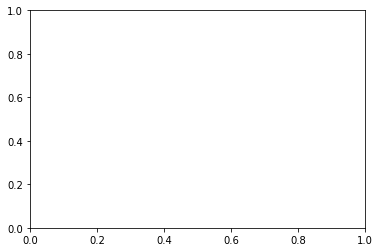

In [4]:
fig, ax = plt.subplots()#matplotlib.figure.Figure;matplotlib.axes._subplots.AxesSubplot
print(type(fig))
print(type(ax))

可以调用AxesSubplot 对象方法来操作画图（与pyplots函数类似）

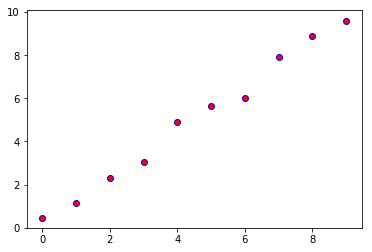

In [18]:
fig, ax = plt.subplots()#ax can be either a single matplotlib.axes.Axes object or an array of Axes objects if more than one subplot was created
ax.scatter(x=np.arange(10), y=np.arange(10) + np.random.rand(10), marker='o', c='r', edgecolor='b')

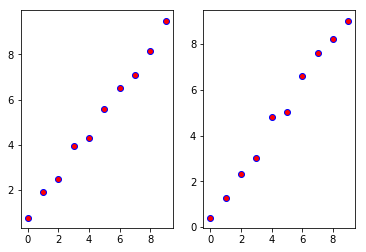

In [19]:
# 一个Figure画多个子图（subplots (Axes)）
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2)
ax1.scatter(x=np.arange(10), y=np.arange(10) + np.random.rand(10), marker='o', c='r', edgecolor='b')
ax2.scatter(x=np.arange(10), y=np.arange(10) + np.random.rand(10), marker='o', c='r', edgecolor='b')

In [20]:
#验证figure与axes的关系
(fig.axes[0] is ax1,fig.axes[1] is ax2)

(True, True)

画图所需数据格式要求   
所有画图函数所需数据格式为：np.array or np.ma.masked_array   
类数组数据如pandas中的Dataframe，np.matrix有时候可能不符合要求。最好在画图之前将数据都转化为np.array格式。

In [27]:
#数据格式转化示例：
b = np.matrix([[1,2],[3,4]])
print(b)
b_asarray = np.asarray(b)
print(type(b_asarray))

import pandas as pd
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
print(a)
a_asndarray = a.values
print(a_asndarray.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
          a         b         c         d         e
0  0.627678  0.407994  0.522473  0.294398  0.278941
1  0.812546  0.712938  0.613659  0.453797  0.239140
2  0.640896  0.365155  0.923526  0.561912  0.157354
3  0.877521  0.626907  0.286879  0.500587  0.554372
(4, 5)


### matplotlib.pyplot 手册

[matplotlib.pyplot.plot API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot)

In [ ]:
import matplotlib.pyplot as plt

[0, 6, 0, 20]

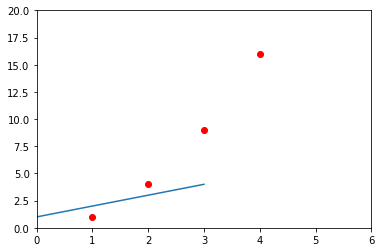

In [35]:
#传入一个列表数据，在plot认为是y值；x值从0开始
plt.plot([1,2,3,4])
plt.plot([1,2,3,4],[1,4,9,16],'ro')#线型
plt.axis([0,6,0,20])#x,y范围 [xmin, xmax, ymin, ymax] 

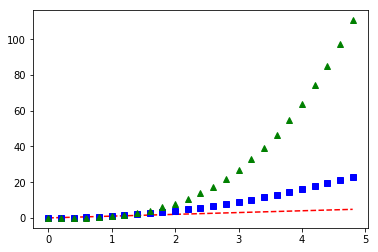

In [36]:
#numpy.array数据
import numpy as np
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

In [37]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data

{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'c': array([39, 33, 37, 45,  5, 30, 39, 15, 19, 20, 43, 10,  8, 13, 45,  4,  6,
        15, 12, 45,  7, 49, 40, 14, 41, 36, 10, 18, 21, 15, 37, 16, 39, 48,
        10, 15,  0, 19,  5, 31, 37, 29, 34, 41, 22,  1, 38,  2, 32, 35]),
 'd': array([-0.20194218,  0.0951738 , -0.13073257,  0.95048181,  0.76471839,
        -1.39859377,  0.22817471, -1.39580927, -0.05727107, -0.93874639,
        -1.40083673, -0.75999931, -1.624956  ,  0.11030623, -1.01922659,
         0.83823128, -0.10587226,  0.49499086,  0.70413737,  0.69288409,
         1.16106775,  2.13662615,  0.54801929,  1.68807726, -0.60796904,
         0.54617731, -2.00328905,  1.97563789,  0.19728032, -1.03641162,
        -0.72411768,  0.60392802, -0.57250907, -0.8657518 , -0.46379654,
         1.6748155 ,  

In [38]:
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
data

{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'b': array([-16.28238354,  -2.50034644,  -3.40626887,   4.14386863,
         -4.64028342, -11.22123793,   7.2199058 ,  -0.86035416,
         -7.12846422,  -9.14785032,  -8.36415449,  18.47664617,
         18.2134151 ,   4.32744173,  12.17099992,  19.25384436,
         16.53749704,  27.92423088,   3.00586764,  25.02855142,
         23.33238949,  12.40034693,  47.29527621,   8.77697212,
         29.5337156 ,  40.98442483,  36.39575512,  15.5052141 ,
         24.37027775,  43.66980619,  20.66661955,  19.9287484 ,
         37.04359845,  31.34396796,  28.79492792,  41.88896693,
         42.90926075,  45.35160564,  30.93656403,  48.02349776,
         52.40024236,  62.89067834,  55.75003498,  37.79653608,
         46.96034536,  40.25415108,  44.94672289,  42.317947

[matplotlib.pyplot.scatter API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)

matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)   
A scatter plot of y vs x with varying marker size and/or color.

Text(0, 0.5, 'entry b')

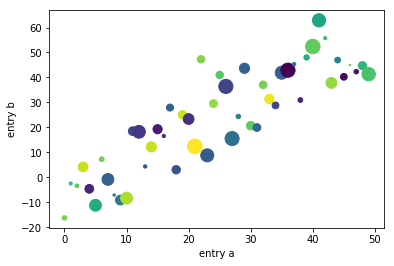

In [42]:
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

Text(0.5, 0.98, 'Categorical Plotting')

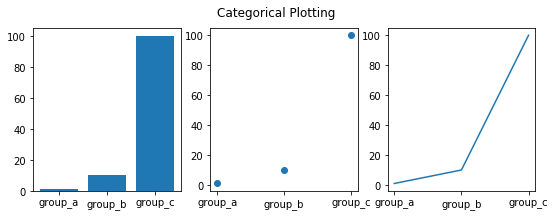

In [43]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)#柱状图
plt.subplot(132)
plt.scatter(names, values)#散点图
plt.subplot(133)
plt.plot(names, values)#折线图
plt.suptitle('Categorical Plotting')